In [1]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

C:\Users\hayashi\anaconda3\envs\tensorflow\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
C:\Users\hayashi\anaconda3\envs\tensorflow\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.6 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 85s 0us/step 


In [2]:
#データの大きさを確認
print('x_train.shape :', x_train.shape)
print('x_test.shape :', x_test.shape)
print('y_train.shape :', x_train.shape)
print('y_train.shape :', x_test.shape)

x_train.shape : (50000, 32, 32, 3)
x_test.shape : (10000, 32, 32, 3)
y_train.shape : (50000, 32, 32, 3)
y_train.shape : (10000, 32, 32, 3)


In [3]:
from tensorflow.keras.utils import to_categorical

#特徴量の正規化
x_train = x_train/255.
x_test = x_test/255.

#クラスラベルの1-hotベクトル化
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [8]:
from tensorflow.keras.layers import Conv2D

model.add(
    Conv2D(
        filters = 32,
        input_shape = (32, 32, 3),
        kernel_size = (3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu'
    )
)

model.add(
    Conv2D(
        filters = 32,
        kernel_size = (3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu'
    )
)

In [9]:
from tensorflow.keras.layers import MaxPooling2D

model.add(MaxPooling2D(pool_size = (2, 2)))

In [10]:
from tensorflow.keras.layers import Dropout

model.add(Dropout(0.25))

In [11]:
model.add(
    Conv2D(
        filters = 64,
        kernel_size = (3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu'
    )
)

model.add(
    Conv2D(
        filters = 64,
        kernel_size = (3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu'
    )
)

model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

In [12]:
model.output_shape

(None, 8, 8, 64)

In [13]:
from tensorflow.keras.layers import Flatten

model.add(Flatten())
model.output_shape

(None, 4096)

In [14]:
from tensorflow.keras.layers import Dense

model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 10, activation = 'softmax'))

In [16]:
from tensorflow.keras.callbacks import TensorBoard

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
tsb = TensorBoard(log_dir='./logs')
history_model = model.fit(
    x_train,
    y_train,
    batch_size = 32,
    epochs = 20,
    validation_split = 0.2,
    callbacks = [tsb]
)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 34ms/step - accuracy: 0.3177 - loss: 1.8420 - val_accuracy: 0.5781 - val_loss: 1.1796
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.5724 - loss: 1.1970 - val_accuracy: 0.6487 - val_loss: 0.9869
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.6415 - loss: 0.9981 - val_accuracy: 0.7058 - val_loss: 0.8433
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms/step - accuracy: 0.6876 - loss: 0.8903 - val_accuracy: 0.7103 - val_loss: 0.8291
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.7102 - loss: 0.8198 - val_accuracy: 0.7326 - val_loss: 0.7546
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.7368 - loss: 0.7462 - val_accuracy: 0.7421 - val_loss: 0.7330
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.7539 - loss: 0.6957 - val_accuracy: 0.7569 - val_loss: 0.7029
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.7669 -

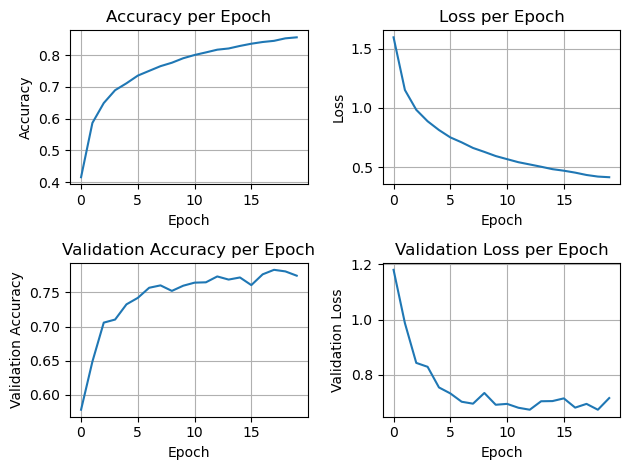

In [19]:
import matplotlib.pyplot as plt

plt.subplot(2, 2, 1)
plt.plot(history_model.history['accuracy'], label='Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(history_model.history['loss'], label='Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(history_model.history['val_accuracy'], label='Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy per Epoch')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(history_model.history['val_loss'], label='Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss per Epoch')
plt.grid(True)

plt.tight_layout()

plt.savefig('training_results3.png')

plt.show()